In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# File to Load (Remember to Change These)
police_killings = "Data/police_killings.csv"

# Read Purchasing File and store into Pandas data frame
police_kills_data = pd.read_csv(police_killings)
police_kills_data

,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,NaN,Male,Unknown race,NaN,31/12/2019,7239-7411 I-40,Memphis,AR,38103.0,...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,1/1/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,NaN,Urban,1
7659,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2
7660,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,1/1/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4
7661,Andrew L. Closson,21,Male,White,http://www.superiortelegram.com/sites/default/...,1/1/2013,U.S. Highway 53,Gordon,WI,54838.0,...,Drug or alcohol use,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Rural,5


In [3]:
## Cleaning data

# Fill Nan with 0
police_kills_data["Victim's age"] = police_kills_data["Victim's age"].fillna(0)
#print(police_kills_data["Victim's age"].fillna(0))
print(police_kills_data.columns)

# Replace unknown with 0
police_kills_data["Victim's age"] = police_kills_data["Victim's age"].replace('Unknown', 0)
# Replace 40s to 45
police_kills_data["Victim's age"] = police_kills_data["Victim's age"].replace('40s', 45)

# Convert string into int
police_kills_data["Victim's age"] = pd.to_numeric(police_kills_data["Victim's age"], errors="coerce")

police_kills_data


Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Unarmed',
       'Alleged Weapon (Source: WaPo)', 'Alleged Threat Level (Source: WaPo)',
       'Fleeing (Source: WaPo)', 'Body Camera (Source: WaPo)',
       'WaPo ID (If included in WaPo database)', 'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
       'ID'],
      dtype='object')


,Victim's name,Victim's age,Victim's gender,Victim's race,URL of image of victim,Date of Incident (month/day/year),Street Address of Incident,City,State,Zipcode,...,Symptoms of mental illness?,Unarmed,Alleged Weapon (Source: WaPo),Alleged Threat Level (Source: WaPo),Fleeing (Source: WaPo),Body Camera (Source: WaPo),WaPo ID (If included in WaPo database),Off-Duty Killing?,Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx ),ID
0,Eric M. Tellez,28,Male,White,https://fatalencounters.org/wp-content/uploads...,31/12/2019,Broad St.,Globe,AZ,85501.0,...,No,Allegedly Armed,knife,other,not fleeing,no,5332.0,NaN,Rural,7664
1,Name withheld by police,0,Male,Unknown race,NaN,31/12/2019,7239-7411 I-40,Memphis,AR,38103.0,...,No,Unclear,unclear,other,NaN,NaN,NaN,NaN,Urban,7665
2,Terry Hudson,57,Male,Black,NaN,31/12/2019,3600 N 24th St,Omaha,NE,68110.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5359.0,NaN,Urban,7661
3,Malik Williams,23,Male,Black,NaN,31/12/2019,30800 14th Avenue South,Federal Way,WA,98003.0,...,No,Allegedly Armed,gun,attack,not fleeing,no,5358.0,NaN,Suburban,7662
4,Frederick Perkins,37,Male,Black,NaN,31/12/2019,17057 N Outer 40 Rd,Chesterfield,MO,63005.0,...,No,Vehicle,vehicle,attack,car,no,5333.0,NaN,Suburban,7667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7658,Mark Chavez,49,Male,Hispanic,http://www.tricitytribuneusa.com/wp-content/up...,1/1/2013,912 Loma Linda Ave.,Farmington,NM,87401.0,...,No,Allegedly Armed,blunt weapon,NaN,NaN,NaN,NaN,NaN,Urban,1
7659,Tyree Bell,31,Male,Black,http://content.omaha.com/media/maps/ps/2013/ja...,1/1/2013,3727 N. 42nd St.,Omaha,NE,68111.0,...,Yes,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Urban,2
7660,Christopher Tavares,21,Male,Hispanic,http://www.krdo.com/image/view/-/17980228/medR...,1/1/2013,Highway 50 and North Elizabeth Street,Pueblo,CO,81008.0,...,No,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Suburban,4
7661,Andrew L. Closson,21,Male,White,http://www.superiortelegram.com/sites/default/...,1/1/2013,U.S. Highway 53,Gordon,WI,54838.0,...,Drug or alcohol use,Allegedly Armed,gun,NaN,NaN,NaN,NaN,NaN,Rural,5


In [4]:
## Calculate the total count and percentage of victims in each group

# Create the bins for ages which is reference from police killings data
bins = [0, 1, 17, 24, 39, 64, 999]

# Create the names for the bins
group_names = ["unknown", "<18", "18-25", "26-39", "40-65", "65+"]

# Place the data series into a new column inside of the DataFrame
age_df = police_kills_data
age_df["Age Demographics"] = pd.cut(age_df["Victim's age"], bins, labels=group_names)

# Create a GroupBy object based upon "View Group"
age_group = age_df.groupby("Age Demographics")

#Calculate total count
unique_age_count = age_group["Victim's name"].nunique()

#Calculate total victim count
total_victims = len(age_df["Victim's name"].unique())

#Calculate percentage for each age group
percentage_victims = round((unique_age_count/total_victims)*100,2)

#Create DataFrame 
age_kills_summary = pd.DataFrame({"Total count":unique_age_count,"Percentage of victims":percentage_victims})
age_kills_summary


,Total count,Percentage of victims
Age Demographics,,
unknown,3,0.04
<18,150,2.02
18-25,1193,16.10
26-39,3346,45.15
40-65,2466,33.27
65+,241,3.25


In [5]:
# Create a GroupBy object based upon "View Group"
age_group = age_df.groupby("Age Demographics")
age_by_gender = age_group["Victim's gender"].value_counts()
age_by_gender

Age Demographics  Victim's gender
unknown           Male                  3
<18               Male                141
                  Female               10
18-25             Male               1143
                  Female               55
                  Transgender           3
26-39             Male               3201
                  Female              164
                  Transgender           4
                  Unknown               2
40-65             Male               2348
                  Female              143
65+               Male                231
                  Female               10
Name: Victim's gender, dtype: int64

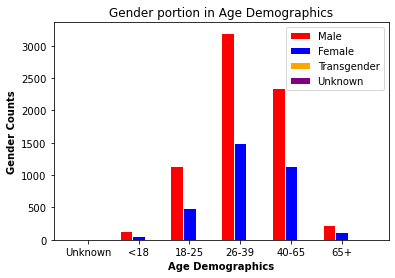

In [13]:
# set width of bar
barWidth = 0.25
 
# set height of bar
male = [3, 141, 1143, 3201, 2348, 231]
female = [0, 10, 55, 164, 143, 10]
transgender = [0, 0, 3, 0, 0, 0]
unknown = [0, 0, 0, 2, 0, 0]
 
# Set position of bar on X axis
r1 = np.arange(len(other))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
# Make the plot
plt.bar(r1, male, color='red', width=barWidth, edgecolor='white', label='Male')
plt.bar(r2, attack, color='blue', width=barWidth, edgecolor='white', label='Female')
plt.bar(r3, transgender, color='orange', width=barWidth, edgecolor='white', label='Transgender')
plt.bar(r4, unknown, color='purple', width=barWidth, edgecolor='white', label='Unknown')

# Add xticks on the middle of the group bars
plt.xlabel('Age Demographics', fontweight='bold')
plt.ylabel('Gender Counts', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(male))], ['Unknown', '<18', '18-25', '26-39', '40-65', '65+'])
plt.title('Gender portion in Age Demographics')

# Create legend & Show graphic
plt.legend()
plt.show()

In [7]:
## Calculate gender in each age group

## Male: Start with filtering male from original age_df

# Replace blank with unknown in "Victim's gender" column
age_df["Victim's gender"] = age_df["Victim's gender"].replace(' ', 'Unknown')


# Filter male in victim gender
age_male = age_df.loc[age_df["Victim's gender"] == "Male", :]

# Rename Victim's gender to male victim
age_male = age_male.rename(columns={"Victim's gender": 'Male victim'})

In [15]:

# Create the bins for ages which is reference from police killings data
bins = [0, 1, 17, 24, 39, 64, 999]

# Create the names for the bins
group_names = ["unknown", "<18", "18-25", "26-39", "40-65", "65+"]

# Place the data series into a new column inside of the DataFrame
male_df = age_male
male_df["Age Demographics"] = pd.cut(male_df["Victim's age"], bins, labels=group_names)

# Create a GroupBy object based upon "View Group"
male_group = male_df.groupby("Age Demographics")

# Count male victims in each age group
male_victims_counts = male_group.count()

# Select only male victim column
male_victims_counts = male_victims_counts["Male victim"]

# Calculate percentage for female victims
male_victims_percentage = round((male_victims_counts/total_victims)*100,2)

#Create summary table
male_victim_summary = pd.DataFrame({"Male victim count":male_victims_counts,"Percentage of male victims":male_victims_percentage})

male_victim_summary


,Male victim count,Percentage of male victims
Age Demographics,,
unknown,3,0.04
<18,141,1.90
18-25,1143,15.42
26-39,3201,43.19
40-65,2348,31.68
65+,231,3.12


In [16]:
## Calculate gender in each age group

## Female: Start with filtering female from original age_df

# Replace blank with unknown in "Victim's gender" column
#age_df["Victim's gender"] = age_df["Victim's gender"].replace(' ', 'Unknown')

# Filter male in victim gender
age_female = age_df.loc[age_df["Victim's gender"] == "Female", :]

# Rename Victim's gender to male victim
age_female = age_female.rename(columns={"Victim's gender": 'Female victim'})



In [10]:
# Create the bins for ages which is reference from police killings data
bins = [0, 1, 17, 24, 39, 64, 999]

# Create the names for the bins
group_names = ["unknown", "<18", "18-25", "26-39", "40-65", "65+"]

# Place the data series into a new column inside of the DataFrame
female_df = age_female
female_df["Age Demographics"] = pd.cut(female_df["Victim's age"], bins, labels=group_names)

# Create a GroupBy object based upon "View Group"
female_group = female_df.groupby("Age Demographics")

# Count female victims in each age group
female_victims_counts = female_group.count()

# Select only female victim column
female_victims_counts = female_victims_counts["Female victim"]
female_victims_percentage = round((female_victims_counts/total_victims)*100,2)

# Create new data frame
female_victim_summary = pd.DataFrame({"Female victim count":female_victims_counts,"Percentage of female victims":female_victims_percentage})

female_victim_summary

,Female victim count,Percentage of female victims
Age Demographics,,
unknown,0,0.00
<18,10,0.13
18-25,55,0.74
26-39,164,2.21
40-65,143,1.93
65+,10,0.13


In [11]:
age_group = age_df.groupby("Age Demographics")
#age_group = age_df.rename(columns={"Alleged Threat Level (Source: WaPo)": "Victim Threat levlel"})
age_threat_level = age_group["Alleged Threat Level (Source: WaPo)"].value_counts()
age_threat_level

Age Demographics  Alleged Threat Level (Source: WaPo)
unknown           other                                     1
<18               attack                                   62
                  other                                    39
                  undetermined                              4
18-25             attack                                  494
                  other                                   233
                  undetermined                             53
26-39             attack                                 1493
                  other                                   737
                  undetermined                            129
40-65             attack                                 1140
                  other                                   497
                  undetermined                             82
65+               attack                                  122
                  other                                    33
                

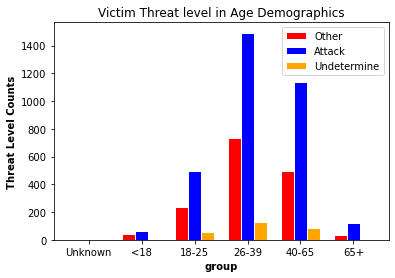

In [12]:
# set width of bar
barWidth = 0.25
 
# set height of bar
other = [1, 39, 233, 737, 497, 33]
attack = [0, 62, 494, 1493, 1140, 122]
undetermine = [0, 4, 53, 129, 82, 7]
 
# Set position of bar on X axis
r1 = np.arange(len(other))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, other, color='red', width=barWidth, edgecolor='white', label='Other')
plt.bar(r2, attack, color='blue', width=barWidth, edgecolor='white', label='Attack')
plt.bar(r3, undetermine, color='orange', width=barWidth, edgecolor='white', label='Undetermine')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.ylabel('Threat Level Counts', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(other))], ['Unknown', '<18', '18-25', '26-39', '40-65', '65+'])
plt.title('Victim Threat level in Age Demographics')

# Create legend & Show graphic
plt.legend()
plt.show()
